In [157]:
import requests, pandas as pd, numpy as np
from pandas import DataFrame
from io import StringIO
import time, json
from datetime import date
import statsmodels
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [158]:
transactions_im = pd.read_csv('transactions_cluster2.csv', header=0)

In [159]:
transactions = transactions_im.fillna(0)

In [160]:
transactions['date'] = pd.to_datetime(transactions['date'], format = '%Y-%m-%d')
transactions = transactions.set_index('date')

In [161]:
ts = transactions.mean(axis=1)
ts.head()

date
2013-01-01    2241.777778
2013-01-02    2241.777778
2013-01-03    1880.111111
2013-01-04    1834.444444
2013-01-05    2079.555556
dtype: float64

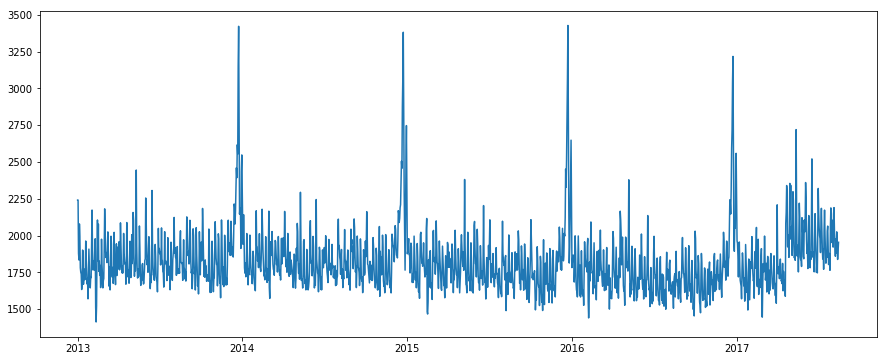

In [162]:
plt.plot(ts.index.to_pydatetime(), ts.values)

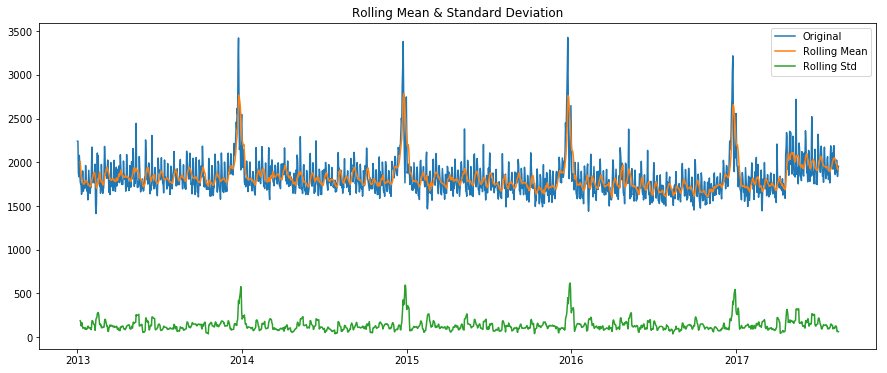

In [163]:
rolmean = ts.rolling(window=7).mean()
rolstd = ts.rolling(window=7).std()

#Plot rolling statistics:
orig = plt.plot(ts, label='Original')
mean = plt.plot(rolmean, label='Rolling Mean')
std = plt.plot(rolstd, label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [164]:
test = adfuller(ts, autolag='AIC')
print('ADF Statistic: \t\t' + str(test[0]))
print('P Value: \t\t' + str(test[1]))
print('Lags Used: \t\t' + str(test[2]))
print('Observations: \t\t' + str(test[3]))
for key,value in test[4].items():
    print('Critical Value ' + str(key) + ': \t' + str(value))
print('Information Criterion: \t' + str(test[5]))

ADF Statistic: 		-7.16174495042
P Value: 		2.95585054428e-10
Lags Used: 		21
Observations: 		1666
Critical Value 1%: 	-3.43428121504
Critical Value 5%: 	-2.86327640807
Critical Value 10%: 	-2.56769442141
Information Criterion: 	20426.901623


In [165]:
ts_log = np.log(ts)

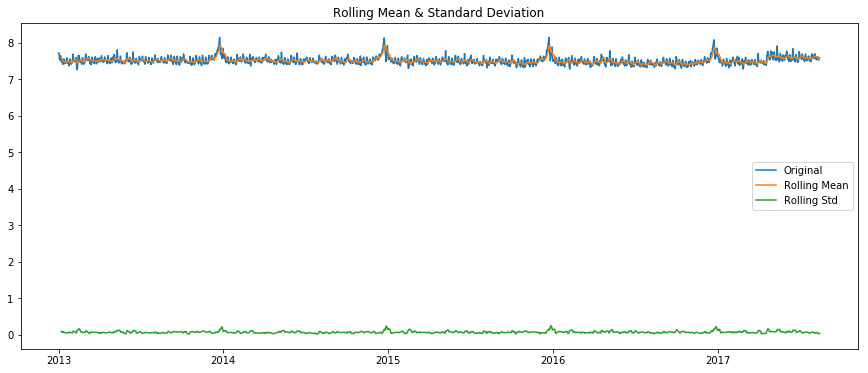

In [166]:
rolmean = ts_log.rolling(window=7).mean()
rolstd = ts_log.rolling(window=7).std()

#Plot rolling statistics:
orig = plt.plot(ts_log, label='Original')
mean = plt.plot(rolmean, label='Rolling Mean')
std = plt.plot(rolstd, label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [167]:
test = adfuller(ts_log, autolag='AIC')
print('ADF Statistic: \t\t' + str(test[0]))
print('P Value: \t\t' + str(test[1]))
print('Lags Used: \t\t' + str(test[2]))
print('Observations: \t\t' + str(test[3]))
for key,value in test[4].items():
    print('Critical Value ' + str(key) + ': \t' + str(value))
print('Information Criterion: \t' + str(test[5]))

ADF Statistic: 		-7.04690014835
P Value: 		5.65612991257e-10
Lags Used: 		21
Observations: 		1666
Critical Value 1%: 	-3.43428121504
Critical Value 5%: 	-2.86327640807
Critical Value 10%: 	-2.56769442141
Information Criterion: 	-4836.528299


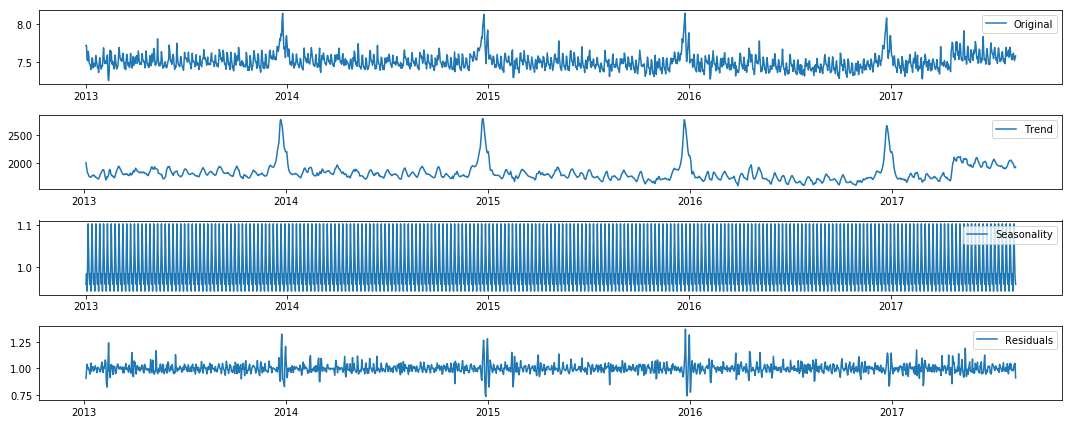

In [168]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts,model='multiplicative')

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

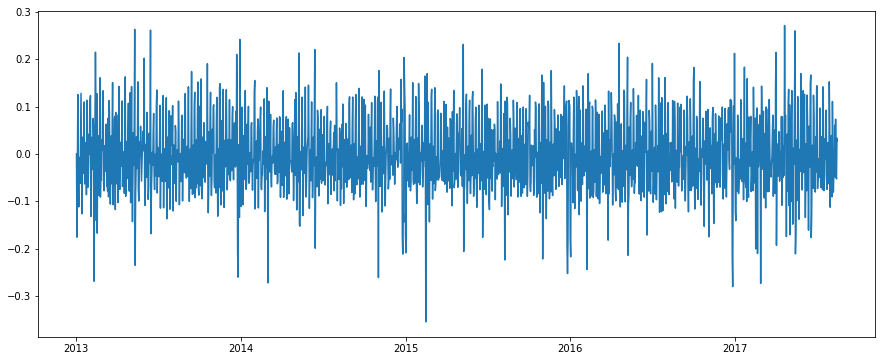

In [169]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff.index.to_pydatetime(), ts_log_diff.values)

In [170]:
ts_log_diff.dropna(inplace=True)

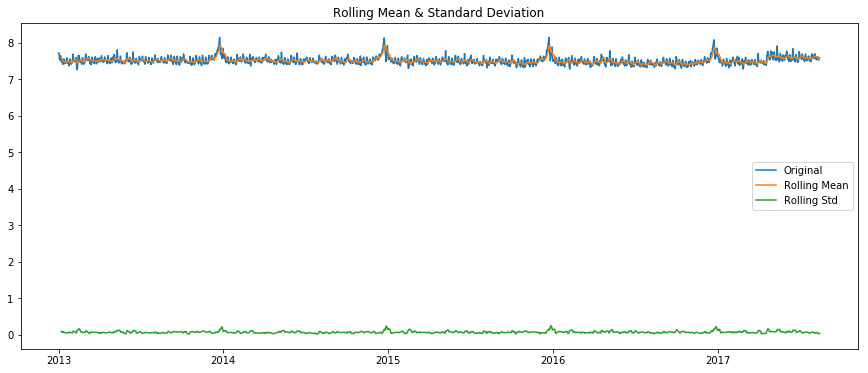

In [171]:
rolmean = ts_log.rolling(window=7).mean()
rolstd = ts_log.rolling(window=7).std()

#Plot rolling statistics:
orig = plt.plot(ts_log, label='Original')
mean = plt.plot(rolmean, label='Rolling Mean')
std = plt.plot(rolstd, label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [172]:
test = adfuller(ts, autolag='AIC')
print('ADF Statistic: \t\t' + str(test[0]))
print('P Value: \t\t' + str(test[1]))
print('Lags Used: \t\t' + str(test[2]))
print('Observations: \t\t' + str(test[3]))
for key,value in test[4].items():
    print('Critical Value ' + str(key) + ': \t' + str(value))
print('Information Criterion: \t' + str(test[5]))

ADF Statistic: 		-7.16174495042
P Value: 		2.95585054428e-10
Lags Used: 		21
Observations: 		1666
Critical Value 1%: 	-3.43428121504
Critical Value 5%: 	-2.86327640807
Critical Value 10%: 	-2.56769442141
Information Criterion: 	20426.901623


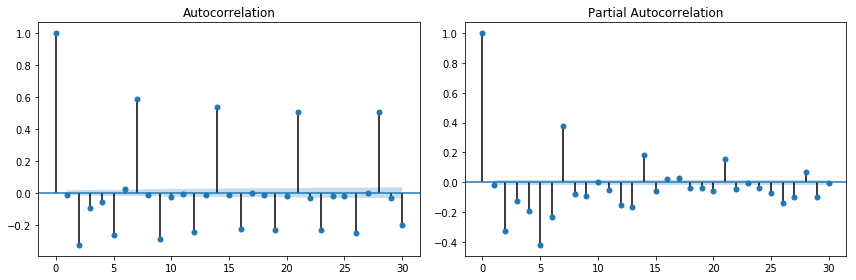

In [173]:
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
fig, axes = plt.subplots(1, 2, sharey=False, sharex=False)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(ts_log_diff, lags=30, ax=axes[0], alpha=0.5)
smt.graphics.plot_pacf(ts_log_diff, lags=30, ax=axes[1], alpha=0.5)
plt.tight_layout()

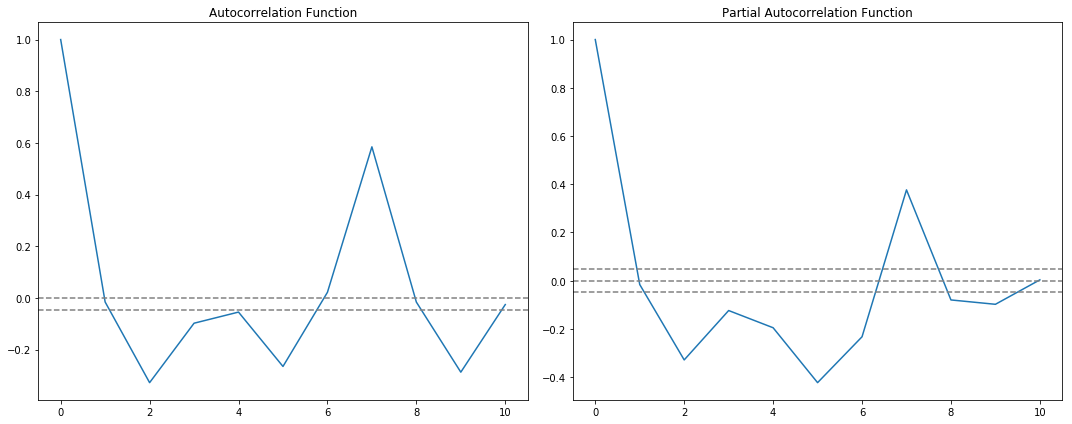

In [174]:
#ACF and PACF plots

lag_acf = acf(ts_log_diff, nlags=10)
lag_pacf = pacf(ts_log_diff, nlags=10, method='ols')

#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [175]:
train_size = int(len(ts_log_diff) * 0.9)
test_size = len(ts_log_diff) - train_size
train, test = ts_log_diff[ts_log_diff.index[0].to_pydatetime():ts_log_diff.index[train_size].to_pydatetime()], ts_log_diff[ts_log_diff.index[train_size].to_pydatetime():ts_log_diff.index[len(ts_log_diff)-1].to_pydatetime()]
print(len(train), len(test))

1519 169


In [176]:
model = ARIMA(ts_log_diff[:1181], order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1) 

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [177]:
predictions=results_ARIMA.predict(start=ts_log_diff.index[1150],end=ts_log_diff.index[1686])

Text(0.5,1,'RSS: nan')

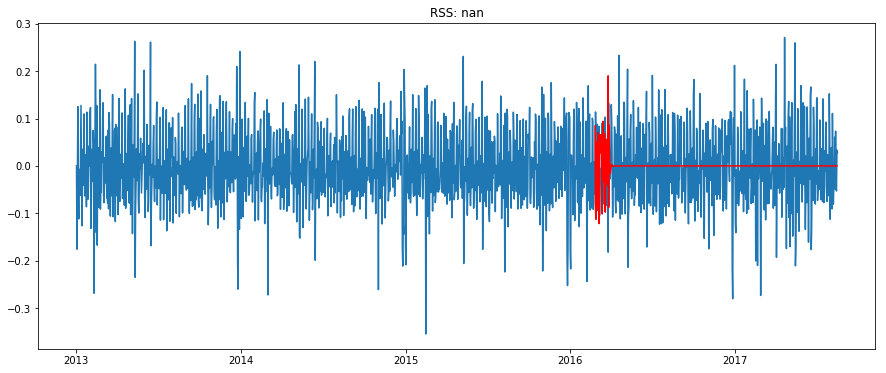

In [178]:
plt.plot(ts_log_diff.index.to_pydatetime(), ts_log_diff.values)
plt.plot(ts_log_diff.index[1149:1686].to_pydatetime(), predictions, color='red')
plt.title('RSS: %.4f'% sum((predictions-ts_log_diff)**2))

In [179]:
print(results_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 1180
Model:                 ARIMA(2, 1, 2)   Log Likelihood                1434.132
Method:                       css-mle   S.D. of innovations              0.072
Date:                Thu, 14 Dec 2017   AIC                          -2856.264
Time:                        19:27:13   BIC                          -2825.824
Sample:                    01-03-2013   HQIC                         -2844.788
                         - 03-27-2016                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.362e-06   2.63e-05     -0.052      0.959   -5.29e-05    5.01e-05
ar.L1.D.y      0.6120      0.034     17.832      0.000       0.545       0.679
ar.L2.D.y     -0.3276      0.029    -11.324      0.0

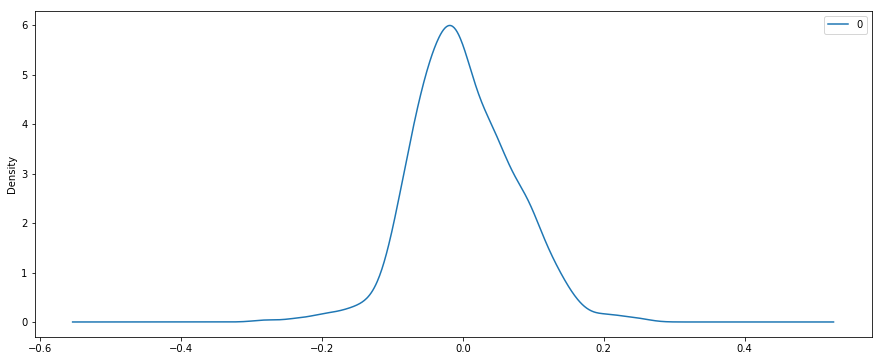

In [180]:
# plot residual errors
residuals = DataFrame(results_ARIMA.resid)
residuals.plot(kind='kde')

In [181]:
print(residuals.describe())

                 0
count  1180.000000
mean      0.000762
std       0.071897
min      -0.283763
25%      -0.047157
50%      -0.005347
75%       0.045838
max       0.256294


In [182]:
predictions_ARIMA_diff = pd.Series(predictions, copy=True)
print(predictions_ARIMA_diff.head())

2016-02-26    0.084299
2016-02-27   -0.094761
2016-02-28   -0.112662
2016-02-29    0.050292
2016-03-01    0.025782
Freq: D, dtype: float64


In [183]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(ts_log.iloc[0], index=ts_log.index[1150:1686])

In [184]:
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)

In [185]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)

Text(0.5,1,'RMSE: nan')

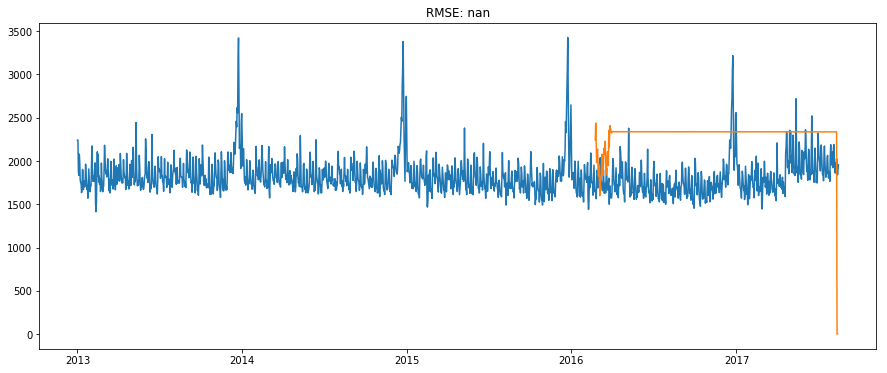

In [186]:
plt.plot(ts.index.to_pydatetime(), ts.values)
plt.plot(ts.index[1148:1686].to_pydatetime(), predictions_ARIMA.values)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts[1148:1686])**2)/test_size))

In [187]:
expected=list(ts)

In [188]:
bias=[expected[i+1148]-predictions_ARIMA[i] for i in range(len(predictions_ARIMA))]

In [189]:
mean_forcast_error=sum(bias)/len(bias)
print('Mean forcast error: %f' % mean_forcast_error)

Mean forcast error: -499.686295


In [190]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(expected[1148:1686], predictions_ARIMA)
print('MAE: %f' % mae)

MAE: 529.386330


In [191]:
def __getnewargs__(self):
    return ((self.endog),(self.k_lags, self.k_diff, self.k_ma))

ARIMA.__getnewargs__ = __getnewargs__
results_ARIMA.save('ARIMA-cluster2.pkl')